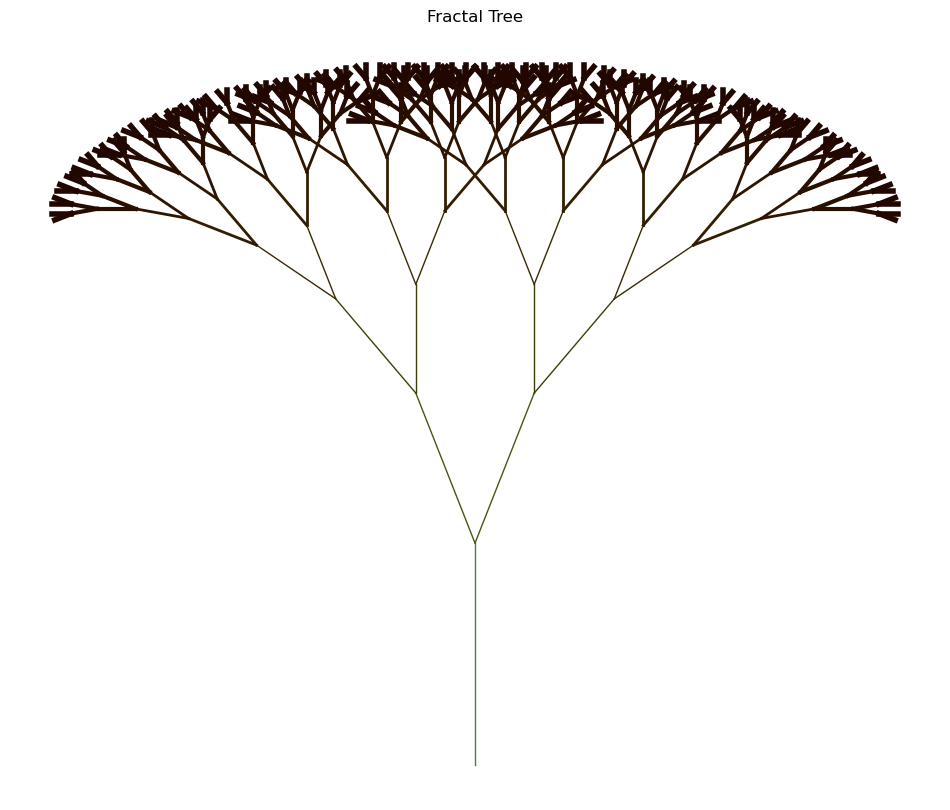

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Fractal Tree parameters
angle_variation = 15  # Base angle for branching
length_ratio = 0.7  # How much each branch shortens
min_length = 5  # Minimum branch length to stop recursion
max_depth = 12  # Maximum recursion depth

# Function to draw the tree
def draw_tree(x, y, length, angle, depth, color):
    if depth > max_depth or length < min_length:
        return
    
    # Calculate the end point of the current branch
    rad = np.radians(angle)
    x_end = x + length * np.cos(rad)
    y_end = y + length * np.sin(rad)
    
    # Draw the branch
    plt.plot([x, x_end], [y, y_end], color=color, linewidth=max(1, depth // 2))
    
    # Next branch parameters
    new_color = (color[0] * 0.9, color[1] * 0.7, color[2] * 0.4)
    next_length = length * length_ratio
    next_depth = depth + 1
    
    # Recursive branching (left and right)
    draw_tree(x_end, y_end, next_length, angle - angle_variation, next_depth, new_color)
    draw_tree(x_end, y_end, next_length, angle + angle_variation, next_depth, new_color)

# Plot the tree
plt.figure(figsize=(12, 10))
plt.title('Fractal Tree')
plt.axis('off')

# Initial tree trunk
draw_tree(0, -100, 120, 90, 0, (0.3, 0.5, 0.2))
plt.show()

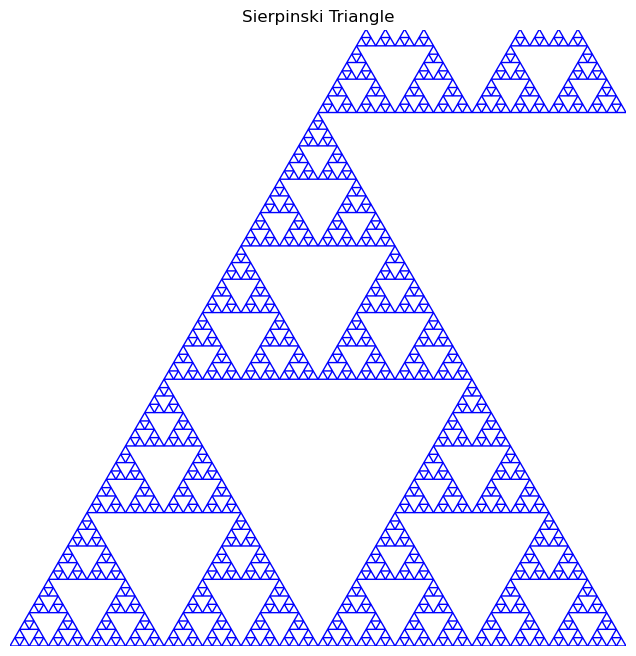

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(ax, vertices, depth, color='black'):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor=color, facecolor='none')
        ax.add_patch(triangle)
    else:
        # Calculate midpoints of each edge
        midpoints = [
            (vertices[i] + vertices[(i+1) % 3]) / 2 for i in range(3)
        ]
        # Draw 3 smaller triangles recursively
        for i in range(3):
            sierpinski_triangle(
                ax, [vertices[i], midpoints[i], midpoints[(i+2) % 3]], depth-1, color
            )

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Define the initial triangle vertices
vertices = np.array([[0, 0], [1, np.sqrt(3)], [2, 0]])
depth = 7  # Adjust depth as needed

sierpinski_triangle(ax, vertices, depth, color='blue')
plt.title("Sierpinski Triangle")
plt.show()

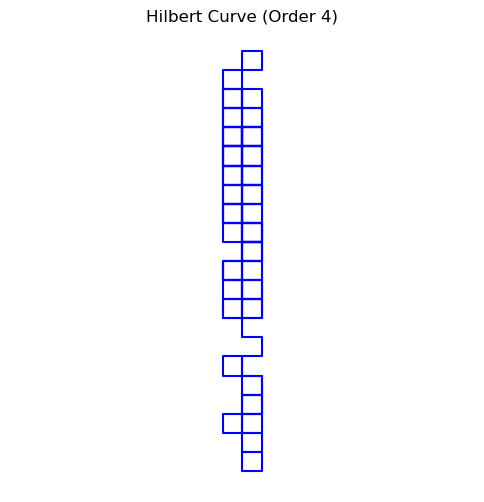

In [1]:
import matplotlib.pyplot as plt

def hilbert_curve(n, angle=90):
    """Generate Hilbert curve points of order n."""
    path = []
    
    def hilbert(level, angle, step, sign=1):
        nonlocal path
        if level == 0:
            return
        angle *= sign
        hilbert(level - 1, -angle, step, -sign)
        path.append(angle)
        hilbert(level - 1, angle, step, sign)
        path.append(angle)
        hilbert(level - 1, angle, step, sign)
        path.append(-angle)
        hilbert(level - 1, -angle, step, -sign)

    # Generate angles
    hilbert(n, angle, 1)

    # Convert angle path to coordinates
    x, y = [0], [0]
    direction = 0  # Start facing "right"
    for a in path:
        direction = (direction + a) % 360
        if direction == 0:
            x.append(x[-1] + 1)
            y.append(y[-1])
        elif direction == 90:
            x.append(x[-1])
            y.append(y[-1] + 1)
        elif direction == 180:
            x.append(x[-1] - 1)
            y.append(y[-1])
        elif direction == 270:
            x.append(x[-1])
            y.append(y[-1] - 1)

    return x, y

# Plotting
order = 4  # Try 1 to 5
x, y = hilbert_curve(order)

plt.figure(figsize=(6, 6))
plt.plot(x, y, color='blue')
plt.title(f'Hilbert Curve (Order {order})')
plt.axis('equal')
plt.axis('off')
plt.show()